In [1]:
# DECISION TREES IMPELEMENTATION WITH FEATURE EMBEDDING

# Importing dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image, display
import matplotlib.pyplot as plt
import pydotplus
import matplotlib.image as pltimg
from dtreeviz.trees import dtreeviz 


In [2]:
# Training and testing data preperation
trainingData = pd.read_csv("../../Data/Dataset.csv")
testingData = pd.read_csv("../../Data/TestingData.csv").values
targets = trainingData["home_team_result"]
features = trainingData.drop(["home_team_result","winner_encoded"],axis=1).values
featuresTrain, targetsTrain = features[0:48], targets[0:48]
featuresTest, targetsTest = testingData, targets[48:]


In [3]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(featuresTrain, targetsTrain)

#Testing for Decision Tree
dtree.predict(featuresTest)
dtree.score(featuresTest,targetsTest)

0.4375

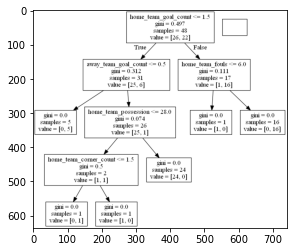

<Figure size 1080x1080 with 0 Axes>

<function matplotlib.pyplot.savefig(*args, **kwargs)>

In [4]:
# Generate graphs
df = pd.read_csv("../../Data/Dataset.csv")
featuresNames = df.drop(["winner_encoded","home_team_result",],axis=1)


df = tree.export_graphviz(dtree, out_file=None, feature_names=featuresNames.columns.values.tolist())
graph = pydotplus.graph_from_dot_data(df)
graph.write_png('mydecisiontree2.png')
img=pltimg.imread('mydecisiontree2.png')
imgplot = plt.imshow(img)
plt.figure(figsize=(15,15))
plt.show()
plt.savefig

In [5]:
# dtreeviz graph
viz = dtreeviz(dtree, featuresTrain, targetsTrain,
                target_name="target",
                feature_names=(featuresNames.columns.values.tolist()),
                class_names=[0, 1])
viz
viz.save("decision_tree.svg")